# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
#api-key
api_key = "f4dc51de99f5da0f6e8efb0b96a803d9"
url = "https://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | badger
Processing Record 3 of Set 1 | daru
Processing Record 4 of Set 1 | margaret river
Processing Record 5 of Set 1 | qaqortoq
Processing Record 6 of Set 1 | port mathurin
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | saldanha
Processing Record 10 of Set 1 | nemuro
Processing Record 11 of Set 1 | inirida
Processing Record 12 of Set 1 | jinxiang
Processing Record 13 of Set 1 | invercargill
Processing Record 14 of Set 1 | kyzyl-mazhalyk
Processing Record 15 of Set 1 | papao
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | la passe
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | stanley
Processing Record 20 of Set 1 | enewetak
Processing Record 21 of Set 1 | ambon
Processing Record 22 of Set 1 | edinburgh of the seven seas
Pro

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,6.56,95,100,17.92,TF,1696125747
1,badger,64.8000,-147.5333,10.14,47,0,3.09,US,1696125612
2,daru,-9.0763,143.2092,26.12,81,100,6.99,PG,1696125747
3,margaret river,-33.9500,115.0667,16.24,72,96,9.42,AU,1696125748
4,qaqortoq,60.7167,-46.0333,2.17,85,70,0.33,GL,1696125748


In [16]:
# Export the City_Data into a csv
output_directory = "output_data"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,6.56,95,100,17.92,TF,1696125747
1,badger,64.8000,-147.5333,10.14,47,0,3.09,US,1696125612
2,daru,-9.0763,143.2092,26.12,81,100,6.99,PG,1696125747
3,margaret river,-33.9500,115.0667,16.24,72,96,9.42,AU,1696125748
4,qaqortoq,60.7167,-46.0333,2.17,85,70,0.33,GL,1696125748


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

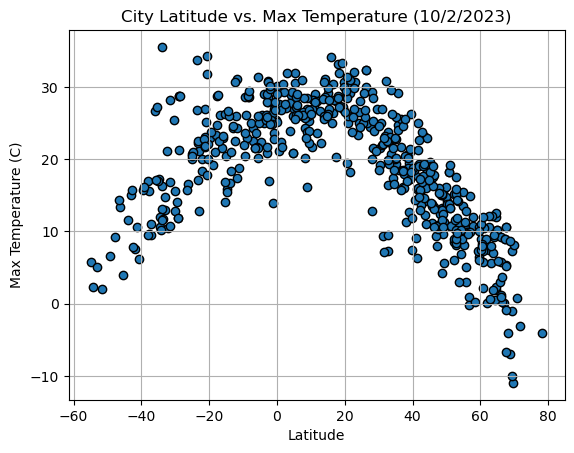

In [24]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
y_value = city_data_df["Max Temp"]
plt.scatter(latitude, y_value, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (10/2/2023)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

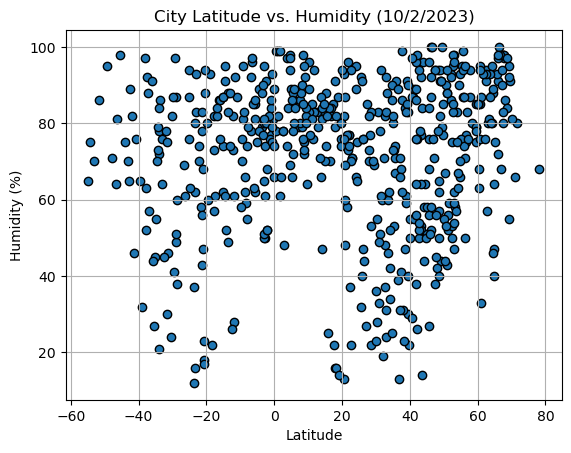

In [23]:
# Build the scatter plots for latitude vs. humidity
y_value = city_data_df["Humidity"]
plt.scatter(latitude, y_value, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (10/2/2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

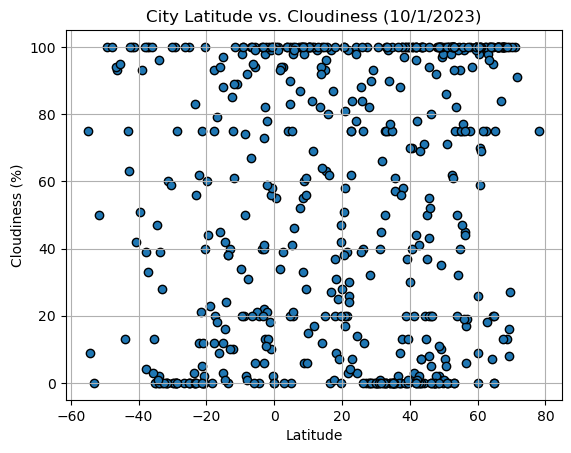

In [22]:
# Build the scatter plots for latitude vs. cloudiness
y_value = city_data_df["Cloudiness"]
plt.scatter(latitude, y_value, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (10/1/2023)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

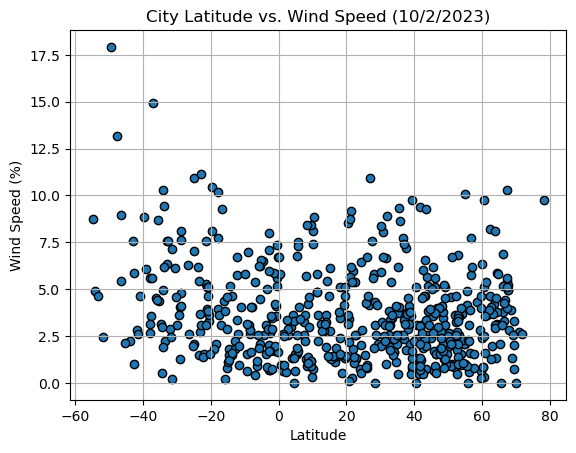

In [25]:
# Build the scatter plots for latitude vs. wind speed
y_value = city_data_df["Wind Speed"]
plt.scatter(latitude, y_value, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (10/2/2023)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,badger,64.8000,-147.5333,10.14,47,0,3.09,US,1696125612
4,qaqortoq,60.7167,-46.0333,2.17,85,70,0.33,GL,1696125748
9,nemuro,43.3236,145.5750,16.93,92,100,6.53,JP,1696125749
10,inirida,3.8653,-67.9239,23.87,97,100,1.34,CO,1696125749
11,jinxiang,27.4327,120.6062,24.49,85,100,7.59,CN,1696125749


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,badger,64.8000,-147.5333,10.14,47,0,3.09,US,1696125612
4,qaqortoq,60.7167,-46.0333,2.17,85,70,0.33,GL,1696125748
9,nemuro,43.3236,145.5750,16.93,92,100,6.53,JP,1696125749
10,inirida,3.8653,-67.9239,23.87,97,100,1.34,CO,1696125749
11,jinxiang,27.4327,120.6062,24.49,85,100,7.59,CN,1696125749


###  Temperature vs. Latitude Linear Regression Plot

The r-value is : 0.7325198532357574


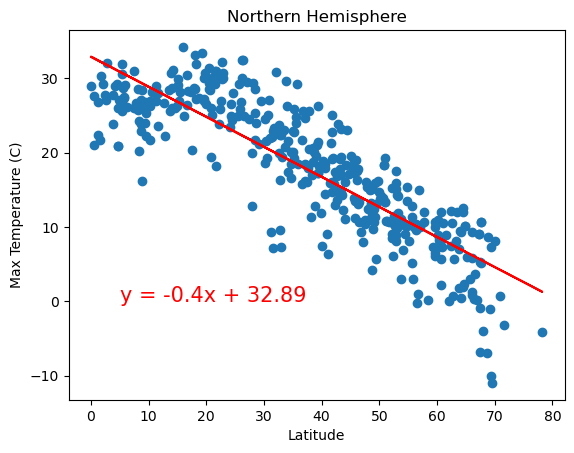

In [53]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,0),fontsize=15,color="red")

plt.title("Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

plt.savefig("output_data/Fig5.png")

print(f'The r-value is : {rvalue **2}')

plt.show()

The r-value is : 0.7325198532357574


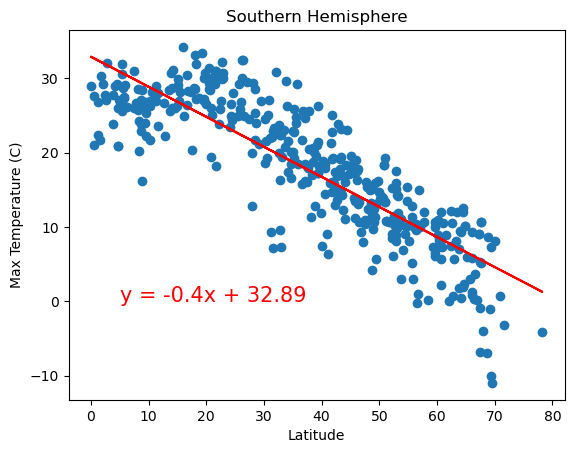

In [44]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,0),fontsize=15,color="red")

plt.title("Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

plt.savefig("output_data/Fig6.png")

print(f'The r-value is : {rvalue **2}')

plt.show()

**Discussion about the linear relationship:** Essentially the same exact r-value in both the scatterplots for both the Northern and Southern Hemispheres, thus, displaying a moderately strong negative correlation

### Humidity vs. Latitude Linear Regression Plot

The r-value is : 0.002672004342287288


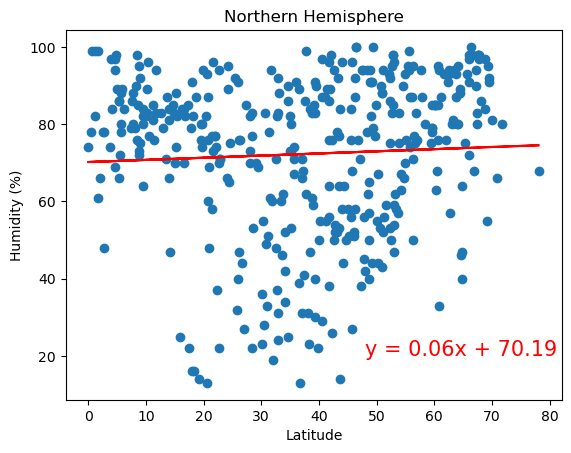

In [45]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(48,20),fontsize=15,color="red")

plt.title("Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("output_data/Fig7.png")

print(f'The r-value is : {rvalue **2}')

plt.show()

The r-value is : 0.002672004342287288


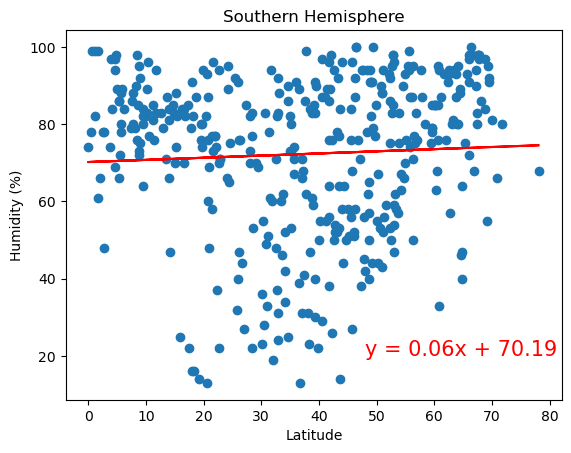

In [46]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(48,20),fontsize=15,color="red")

plt.title("Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("output_data/Fig8.png")

print(f'The r-value is : {rvalue **2}')

plt.show()

**Discussion about the linear relationship:** No relationship between latitude and humidity for both Northern and Southern Hemispheres. Same exact r-values.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is : 0.0053558786406059595


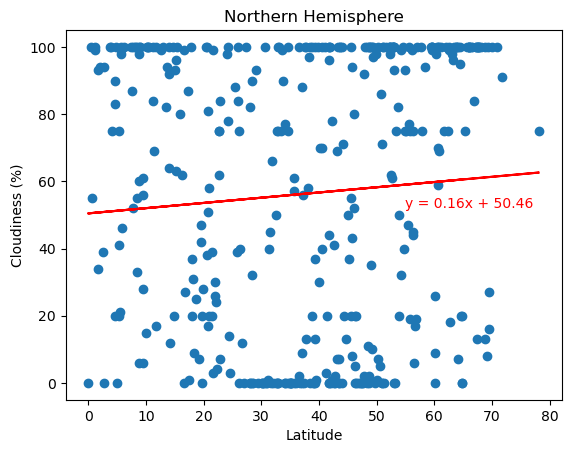

In [47]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55,52),fontsize=10,color="red")

plt.title("Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("output_data/Fig9.png")

print(f'The r-value is : {rvalue **2}')

plt.show()

The r-value is : 0.0053558786406059595


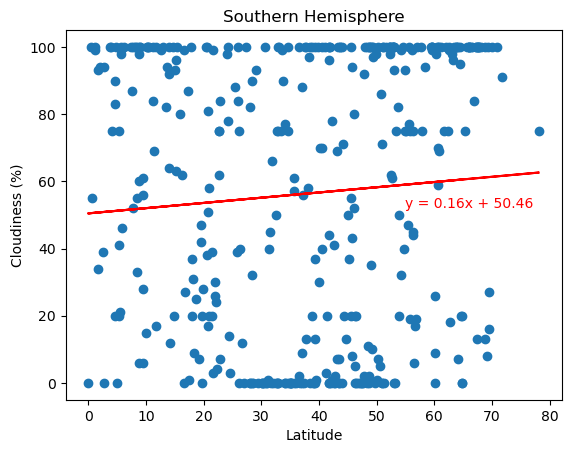

In [48]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55,52),fontsize=10,color="red")

plt.title("Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("output_data/Fig10.png")

print(f'The r-value is : {rvalue **2}')

plt.show()

**Discussion about the linear relationship:** Very weak, posiyiv relationship between latitude and cloudiness for both Northern and Southern Hemispheres. Same exact r-values.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : 0.000978078392922127


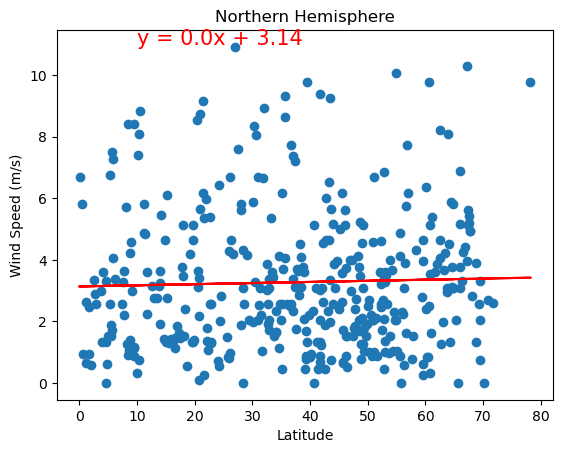

In [49]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,11),fontsize=15,color="red")

plt.title("Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

plt.savefig("output_data/Fig11.png")

print(f'The r-value is : {rvalue **2}')

plt.show()

The r-value is : 0.000978078392922127


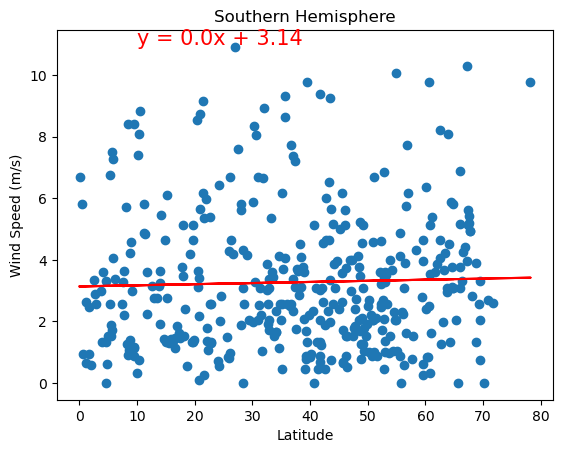

In [50]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,11),fontsize=15,color="red")

plt.title("Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

plt.savefig("output_data/Fig12.png")

print(f'The r-value is : {rvalue **2}')

plt.show()

**Discussion about the linear relationship:** No relationship between latitude and windspeed for both Northern and Southern Hemispheres. Same exact r-values.